In [2]:
"""
PoGaIN: Poisson-Gaussian Image Noise Modeling from Paired Samples

Authors: Nicolas Bähler, Majed El Helou, Étienne Objois, Kaan Okumuş, and Sabine
Süsstrunk, Fellow, IEEE.

This file contains utility methods.
"""

import numpy as np
from PIL import Image
from scipy.stats import norm, poisson


def load_image(path: str, keep_shape=False) -> tuple[np.ndarray, tuple[int, int]]:
    # Load the image and convert into numpy array
    img = Image.open(path)
    array = np.asarray(img)

    if len(array.shape) == 3:
        array = np.mean(array, axis=2)

    array = array / 255

    return array if keep_shape else (array.flatten(), array.shape)


def add_noise(x: np.ndarray, a: float, b: float, seed=None) -> np.ndarray:
    np.random.seed(seed)
    n = len(x)

    poisson_noise = poisson.rvs(mu=a * x, size=n)
    gaussian_noise = norm.rvs(scale=b, size=n)
    return poisson_noise / a + gaussian_noise


def create_fake_image(n, lower=0, upper=1) -> np.ndarray:
    return np.random.uniform(lower, upper, size=n)

In [3]:
# create correct sub-directories in TB_Chest_Radiography_Database
import os
os.mkdir('../TB_Chest_Radiography_Database/Noise/Normal')
os.mkdir('../TB_Chest_Radiography_Database/Noise/Tuberculosis')
os.mkdir('../TB_Chest_Radiography_Database/Noise/test_set')
os.mkdir('../TB_Chest_Radiography_Database/Noise/test_set/Normal')
os.mkdir('../TB_Chest_Radiography_Database/Noise/test_set/Tuberculosis')

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import imageio

def add_noise_to_image(image_path, new_path, a, b, seed):
    # Define the root directory
    root = os.path.join(os.path.abspath(''), "..")
    # Load noise-free image
    x, shape = load_image(image_path)

    # Synthesize and add noise to image
    y = add_noise(x, a, b, seed)

    y = y.reshape(shape)
    y_scaled = ((y - y.min()) / (y.max() - y.min()) * 255).astype('uint8')
    noisy_image_path = os.path.join(root,'Project_V2',new_path)
    imageio.imwrite(noisy_image_path, y_scaled)
    # print(f"Noisy image saved at: {noisy_image_path}")

# Example usage:
add_noise_to_image("../TB_Chest_Radiography_Database/Normal/Normal-1.png", "../TB_Chest_Radiography_Database/Example.png", 20, 0.2, 42)

In [15]:
# for every image in the data/test_original folder, add noise and save it to the data/test_noisy folder with the same name, and use the functions load_image and add_noise
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

a = 32
b = 0.1
seed = 42
# Load your original image (replace 'your_image_path' with the actual path)
# for every image in data/test_original

main_path = '../TB_Chest_Radiography_Database/'

path = 'test_set/Tuberculosis/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'Noise/' + path + filename,a, b, seed)

path = 'test_set/Normal/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename,main_path + 'Noise/' + path + filename, a, b, seed)

path = 'Normal/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'Noise/' + path + filename,a, b, seed)

path = 'Tuberculosis/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'Noise/' + path + filename,a, b, seed)


 21%|██        | 669/3150 [00:30<01:54, 21.75it/s]


KeyboardInterrupt: 

In [30]:
# create correct sub-directories in TB_Chest_Radiography_Database
import os
os.mkdir('../TB_Chest_Radiography_Database/Mixed')
os.mkdir('../TB_Chest_Radiography_Database/Mixed/Normal')
os.mkdir('../TB_Chest_Radiography_Database/Mixed/Tuberculosis')
os.mkdir('../TB_Chest_Radiography_Database/Mixed/test_set')
os.mkdir('../TB_Chest_Radiography_Database/Mixed/test_set/Normal')
os.mkdir('../TB_Chest_Radiography_Database/Mixed/test_set/Tuberculosis')

Creating a Mixture of Noisy and Non-Noisy Images to test on:

In [33]:
# range of noise parameters
# a : [15, 100]
# b : [0.01, 0.1]

# for every image in the data/test_original folder, add noise and save it to the data/test_noisy folder with the same name, and use the functions load_image and add_noise
import os
import numpy as np
import shutil
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the range of noise parameters
a_range = [15, 100]
b_range = [0.01, 0.1]

# Define the percentage of images with no noise
no_noise_percentage = 0.3

# Load your original image (replace 'your_image_path' with the actual path)
# for every image in data/test_original

main_path = '../TB_Chest_Radiography_Database/'

path = 'test_set/Tuberculosis/'
for filename in tqdm(os.listdir(main_path + path)):
    # Randomly decide whether to apply noise or not
    apply_noise = np.random.choice([True, False], p=[1 - no_noise_percentage, no_noise_percentage])
    
    if apply_noise:
        # Randomly select a and b within the specified ranges
        a = np.random.uniform(a_range[0], a_range[1])
        b = np.random.uniform(b_range[0], b_range[1])
        
        # Add Poisson-Gaussian noise
        noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'Mixed/' + path + filename, a, b, seed)
    else:
        # Copy the image without applying noise
        shutil.copy(main_path + path + filename, main_path + 'Mixed/' + path + filename)

path = 'test_set/Normal/'
for filename in tqdm(os.listdir(main_path + path)):
    # Randomly decide whether to apply noise or not
    apply_noise = np.random.choice([True, False], p=[1 - no_noise_percentage, no_noise_percentage])
    
    if apply_noise:
        # Randomly select a and b within the specified ranges
        a = np.random.uniform(a_range[0], a_range[1])
        b = np.random.uniform(b_range[0], b_range[1])
        
        # Add Poisson-Gaussian noise
        noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'Mixed/' + path + filename, a, b, seed)
    else:
        # Copy the image without applying noise
        shutil.copy(main_path + path + filename, main_path + 'Mixed/' + path + filename)

path = 'Normal/'
for filename in tqdm(os.listdir(main_path + path)):
    # Randomly decide whether to apply noise or not
    apply_noise = np.random.choice([True, False], p=[1 - no_noise_percentage, no_noise_percentage])
    
    if apply_noise:
        # Randomly select a and b within the specified ranges
        a = np.random.uniform(a_range[0], a_range[1])
        b = np.random.uniform(b_range[0], b_range[1])
        
        # Add Poisson-Gaussian noise
        noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'Mixed/' + path + filename, a, b, seed)
    else:
        # Copy the image without applying noise
        shutil.copy(main_path + path + filename, main_path + 'Mixed/' + path + filename)

path = 'Tuberculosis/'
for filename in tqdm(os.listdir(main_path + path)):
    # Randomly decide whether to apply noise or not
    apply_noise = np.random.choice([True, False], p=[1 - no_noise_percentage, no_noise_percentage])
    
    if apply_noise:
        # Randomly select a and b within the specified ranges
        a = np.random.uniform(a_range[0], a_range[1])
        b = np.random.uniform(b_range[0], b_range[1])
        
        # Add Poisson-Gaussian noise
        noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'Mixed/' + path + filename, a, b, seed)
    else:
        # Copy the image without applying noise
        shutil.copy(main_path + path + filename, main_path + 'Mixed/' + path + filename)


100%|██████████| 630/630 [00:19<00:00, 32.27it/s]


In [19]:
# create correct sub-directories in TB_Chest_Radiography_Database
import os
os.mkdir('../TB_Chest_Radiography_Database/More_Noise')
os.mkdir('../TB_Chest_Radiography_Database/More_Noise/Normal')
os.mkdir('../TB_Chest_Radiography_Database/More_Noise/Tuberculosis')
os.mkdir('../TB_Chest_Radiography_Database/More_Noise/test_set')
os.mkdir('../TB_Chest_Radiography_Database/More_Noise/test_set/Normal')
os.mkdir('../TB_Chest_Radiography_Database/More_Noise/test_set/Tuberculosis')

In [20]:
# for every image in the data/test_original folder, add noise and save it to the data/test_noisy folder with the same name, and use the functions load_image and add_noise
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

a = 20
b = 0.2
seed = 42
# Load your original image (replace 'your_image_path' with the actual path)
# for every image in data/test_original

main_path = '../TB_Chest_Radiography_Database/'

path = 'test_set/Tuberculosis/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'More_Noise/' + path + filename,a, b, seed)

path = 'test_set/Normal/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename,main_path + 'More_Noise/' + path + filename, a, b, seed)

path = 'Normal/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'More_Noise/' + path + filename,a, b, seed)

path = 'Tuberculosis/'
for filename in tqdm(os.listdir(main_path + path)):
    # Add Poisson-Gaussian noise
    noisy_image_python = add_noise_to_image(main_path + path + filename, main_path + 'More_Noise/' + path + filename,a, b, seed)

100%|██████████| 630/630 [00:28<00:00, 22.19it/s]


In [5]:
# get the wavelet transform of an image
import pywt
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import cv2

def wavelet_transform(image_path, new_path):
    # Define the root directory
    root = os.path.join(os.path.abspath(''), "..")
    # Load noise-free image
    x, shape = load_image(image_path)
    print(shape)
    # Synthesize and add noise to image
    coeffs2 = pywt.dwt2(x, 'haar')
    LL, (LH, HL, HH) = coeffs2
    LL_scaled = ((LL - LL.min()) / (LL.max() - LL.min()) * 255).astype('uint8')
    LH_scaled = ((LH - LH.min()) / (LH.max() - LH.min()) * 255).astype('uint8')
    HL_scaled = ((HL - HL.min()) / (HL.max() - HL.min()) * 255).astype('uint8')
    HH_scaled = ((HH - HH.min()) / (HH.max() - HH.min()) * 255).astype('uint8')
    # noisy_image_path = os.path.join(root,'Project_V2',new_path)
    # imageio.imwrite(noisy_image_path, y_scaled)
    # print(f"Noisy image saved at: {noisy_image_path}")
    return LL_scaled, LH_scaled, HL_scaled, HH_scaled

# Example usage:
wavelet_transform("../TB_Chest_Radiography_Database/Normal/Normal-1.png", "../TB_Chest_Radiography_Database/Example.png")

(512, 512)


ValueError: Input array has fewer dimensions than the specified axes

(512, 512)


/var/folders/x_/0gc9r1qx05nfx7tp3rdjsf340000gn/T/ipykernel_3335/3248152704.py:26: RuntimeWarning: invalid value encountered in divide
  HL_scaled = ((HL - HL.min()) / (HL.max() - HL.min()) * 255).astype('uint8')
/var/folders/x_/0gc9r1qx05nfx7tp3rdjsf340000gn/T/ipykernel_3335/3248152704.py:26: RuntimeWarning: invalid value encountered in cast
  HL_scaled = ((HL - HL.min()) / (HL.max() - HL.min()) * 255).astype('uint8')
/var/folders/x_/0gc9r1qx05nfx7tp3rdjsf340000gn/T/ipykernel_3335/3248152704.py:27: RuntimeWarning: invalid value encountered in divide
  HH_scaled = ((HH - HH.min()) / (HH.max() - HH.min()) * 255).astype('uint8')
/var/folders/x_/0gc9r1qx05nfx7tp3rdjsf340000gn/T/ipykernel_3335/3248152704.py:27: RuntimeWarning: invalid value encountered in cast
  HH_scaled = ((HH - HH.min()) / (HH.max() - HH.min()) * 255).astype('uint8')


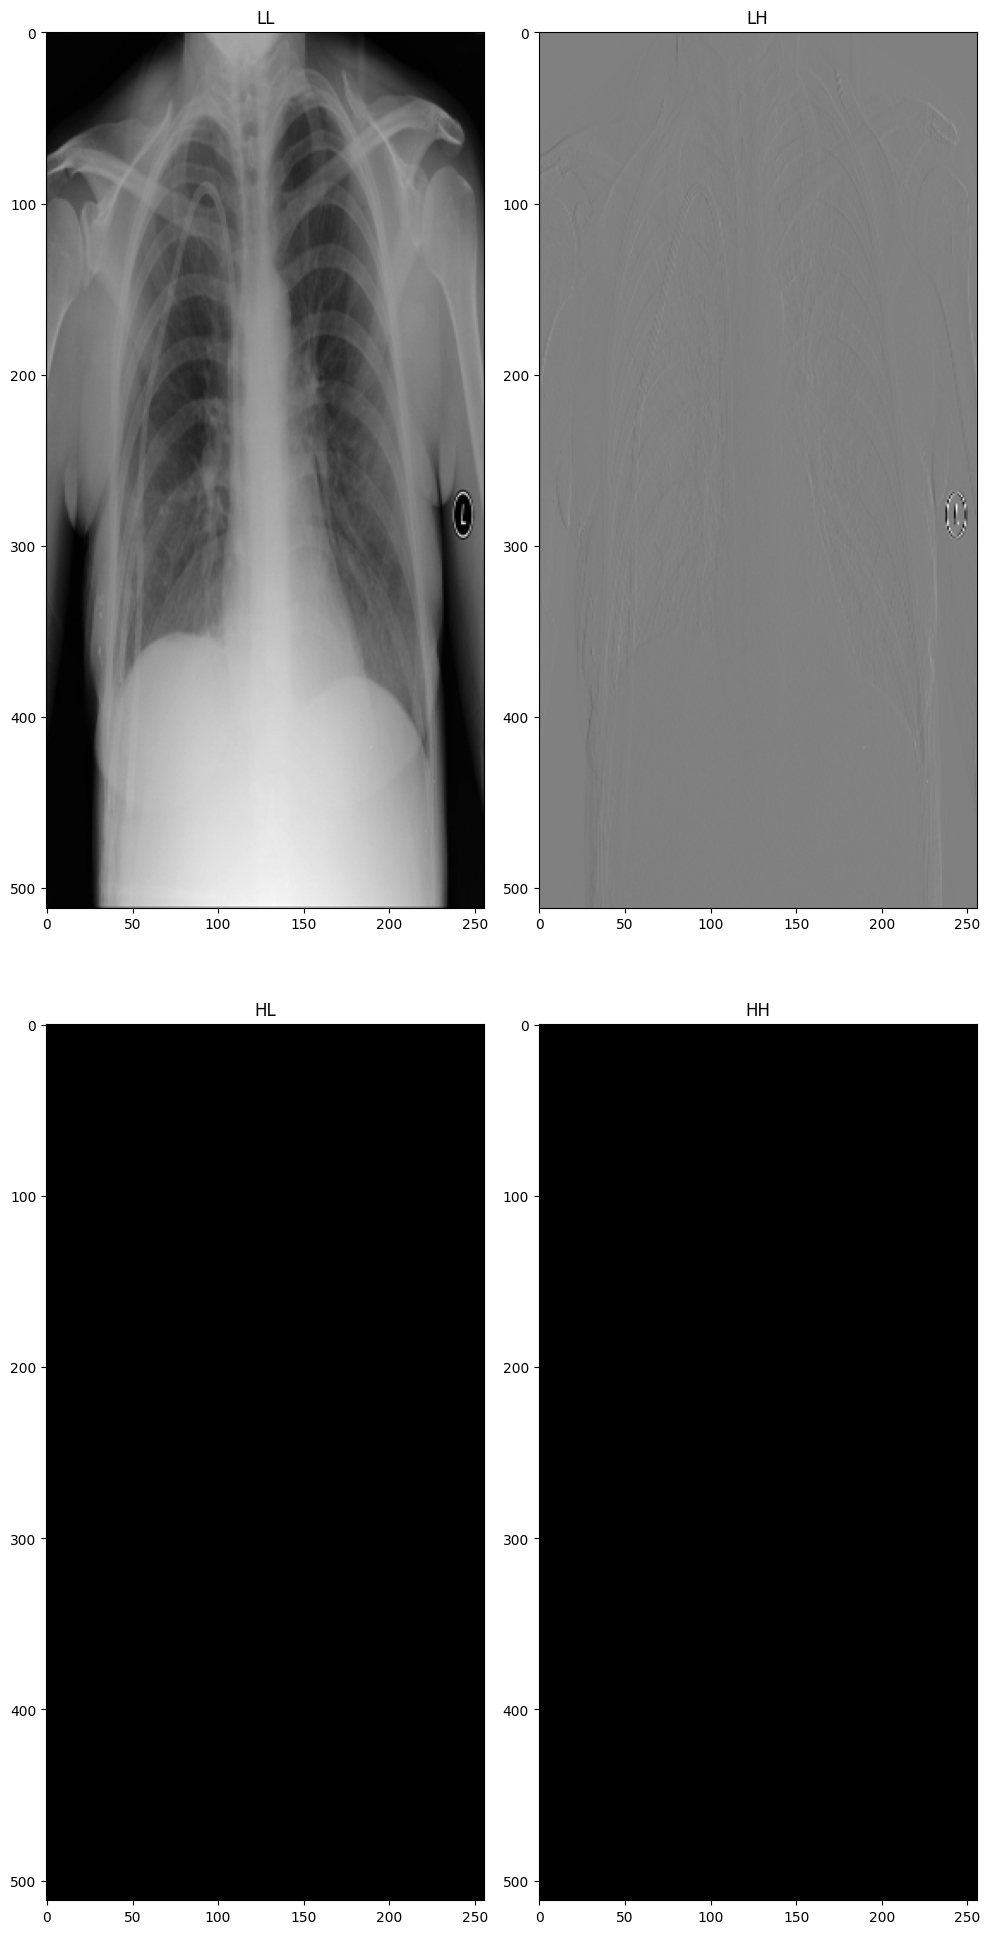

In [14]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import cv2

def load_image(image_path):
    x = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return x, x.shape

def wavelet_transform(image_path):
    # Load grayscale image
    x, shape = load_image(image_path)
    print(shape)
    
    # Ensure the image has the correct shape (2D or 3D)
    if len(x.shape) == 2:
        x = np.expand_dims(x, axis=-1)  # Add channel dimension for 2D grayscale image

    # Synthesize and add noise to the image
    coeffs2 = pywt.dwt2(x, 'haar')
    LL, (LH, HL, HH) = coeffs2
    # LL_scaled = ((LL - LL.min()) / (LL.max() - LL.min()) * 255).astype('uint8')
    # LH_scaled = ((LH - LH.min()) / (LH.max() - LH.min()) * 255).astype('uint8')
    # HL_scaled = ((HL - HL.min()) / (HL.max() - HL.min()) * 255).astype('uint8')
    # HH_scaled = ((HH - HH.min()) / (HH.max() - HH.min()) * 255).astype('uint8')
    
    return LL_scaled, LH_scaled, HL_scaled, HH_scaled

# Example usage:
LL_scaled, LH_scaled, HL_scaled, HH_scaled = wavelet_transform("../TB_Chest_Radiography_Database/Normal/Normal-1.png")
# plot the wavelet transform of the image
import matplotlib.pyplot as plt
import os
import imageio

def plot_wavelet_transform(LL_scaled, LH_scaled, HL_scaled, HH_scaled, new_path):
    # Define the root directory
    root = os.path.join(os.path.abspath(''), "..")
    # Plot the wavelet transform
    fig, ax = plt.subplots(2, 2, figsize=(10, 20))
    ax[0, 0].imshow(LL_scaled, cmap='gray')
    ax[0, 0].set_title('LL')
    ax[0, 1].imshow(LH_scaled, cmap='gray')
    ax[0, 1].set_title('LH')
    ax[1, 0].imshow(HL_scaled, cmap='gray')
    ax[1, 0].set_title('HL')
    ax[1, 1].imshow(HH_scaled, cmap='gray')
    ax[1, 1].set_title('HH')
    plt.tight_layout()
    plt.savefig(os.path.join(new_path))
    plt.show()

# Example usage:
plot_wavelet_transform(LL_scaled, LH_scaled, HL_scaled, HH_scaled, "../TB_Chest_Radiography_Database/Example.png")

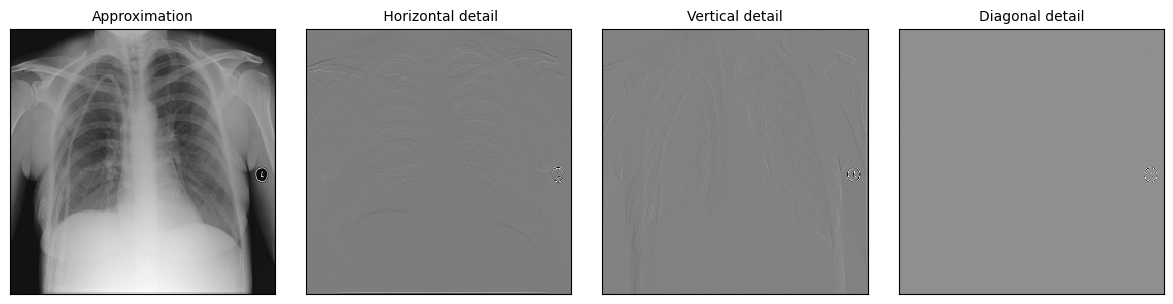

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original, shape = load_image("../TB_Chest_Radiography_Database/Normal/Normal-1.png")

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original, shape = load_image("../TB_Chest_Radiography_Database/Noise/Normal/Normal-1.png")

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [22]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import cv2

def wavelet_denoise(image, wavelet='db1', level=1, threshold_type='soft', threshold_multiplier=0.1):
    # Apply wavelet transform
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    
    # Threshold the coefficients at each level
    thresholded_coeffs = [pywt.threshold(c, threshold_multiplier * np.max(np.abs(c)), mode=threshold_type) for c in coeffs]
    
    # Reorganize the thresholded coefficients
    a = thresholded_coeffs[0]  # Approximation coefficients
    d = thresholded_coeffs[1:]  # Detail coefficients
    
    # Reconstruct the denoised image
    denoised_image = pywt.waverec2((a, d), wavelet)
    
    return denoised_image

# Example usage:
# Assuming 'original_image' is your image as a numpy array
original_image = cv2.imread("../TB_Chest_Radiography_Database/Noise/Normal/Normal-1.png", cv2.IMREAD_GRAYSCALE)

# Apply wavelet denoising
denoised_image = wavelet_denoise(original_image, wavelet='db1', level=3, threshold_multiplier=0.1)

# Display the original and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()



ValueError: All detail shapes must be the same length.